<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

- does recency have affect the chances of donating blood im March
- does time have an effect o
- what factors have the bigest impact/correlation to donating blood in march

## Actual Question
Choose the **one** question that should be answered.

- which individuals are likely to donate blood in March


# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report



%matplotlib inline

In [2]:
df = pd.read_csv('transfusion.data', header = 0, sep=',')
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
#simplify column lables
df.columns = ['recency', 'frequency', 'monetary','time', 'donated']
df

,recency,frequency,monetary,time,donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [5]:
df.isnull().sum()

recency      0
frequency    0
monetary     0
time         0
donated      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
donated,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


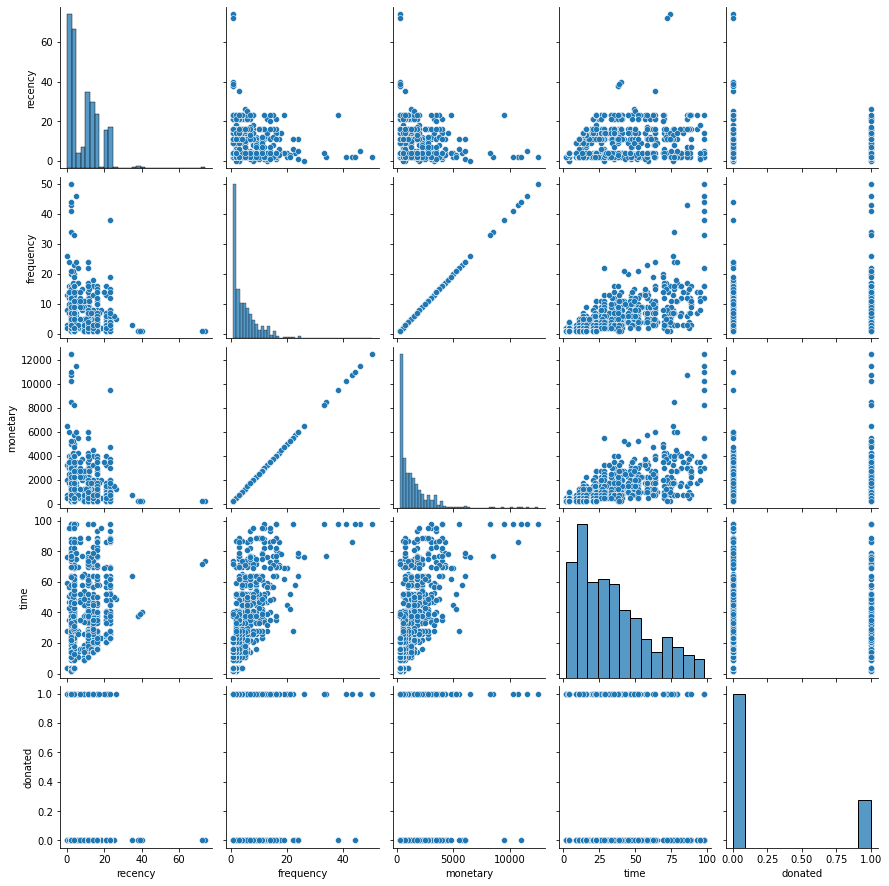

In [7]:
sns.pairplot(df)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

C:\Users\dmuwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


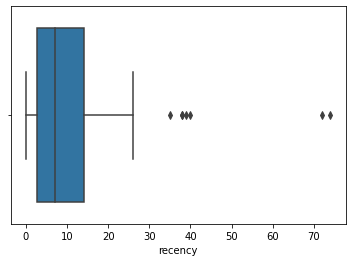

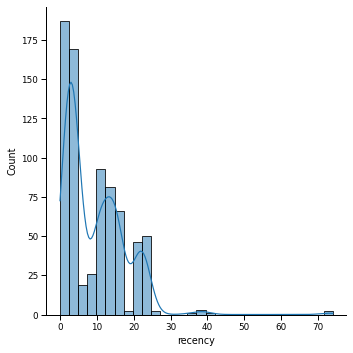

In [8]:
#recency distribution
sns.boxplot(df.recency)
sns.set_context('paper')
sns.displot(df.recency, kde = True)
plt.show()

C:\Users\dmuwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


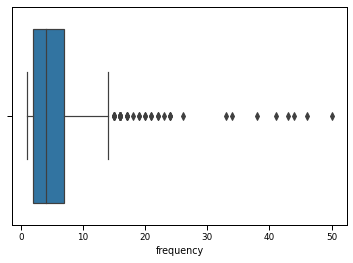

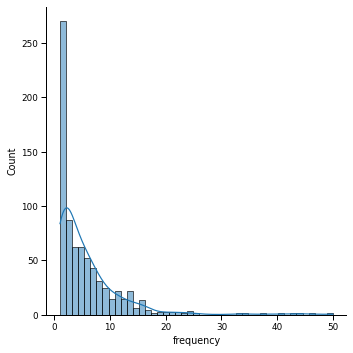

In [9]:
#frequency distribution
sns.boxplot(df.frequency)
sns.set_context('paper')
sns.displot(df.frequency, kde = True)
plt.show()

C:\Users\dmuwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


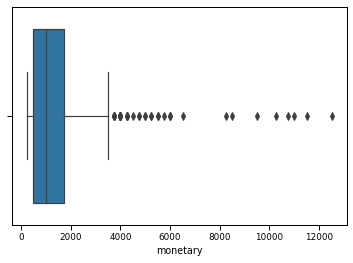

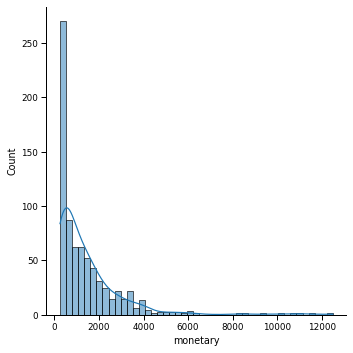

In [10]:
#monetery distribution
sns.boxplot(df.monetary)
sns.set_context('paper')
sns.displot(df.monetary, kde = True)
plt.show()

C:\Users\dmuwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


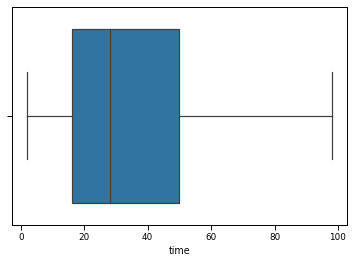

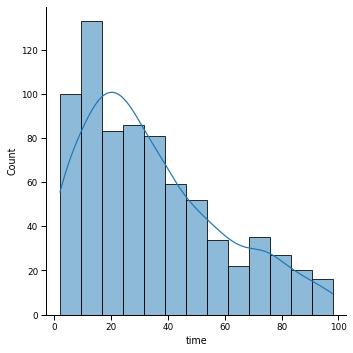

In [11]:
#time distribution
sns.boxplot(df.time)
sns.set_context('paper')
sns.displot(df.time, kde = True)
plt.show()

C:\Users\dmuwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


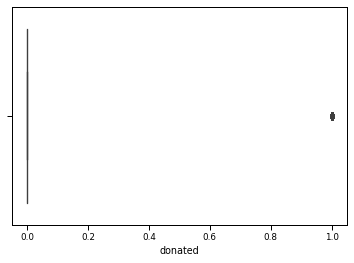

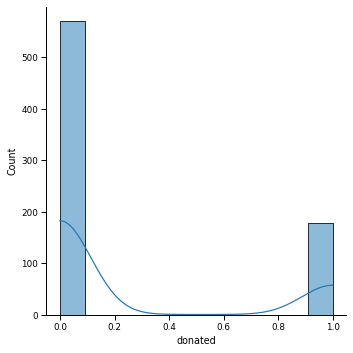

In [12]:
#frequency distribution
sns.boxplot(df.donated)
sns.set_context('paper')
sns.displot(df.donated, kde = True)
plt.show()

In [13]:
print('recency \n:', df.recency.unique())
print('frequency \n:', df.frequency.unique())
print('monetary \n:', df.monetary.unique())
print('time \n:', df.time.unique())
print('donated \n;', df.donated.unique())

recency 
: [ 2  0  1  4  5  9  3 12  6 11 10 13  8 14  7 16 15 23 21 18 22 26 35 38
 40 74 20 17 25 39 72]
frequency 
: [50 13 16 20 24  4  7 12  9 46 23  3 10  6  5 14 15 11  8  2 19 17  1 22
 18 38 43 34 44 26 41 21 33]
monetary 
: [12500  3250  4000  5000  6000  1000  1750  3000  2250 11500  5750   750
  2500  1500  1250  3500  3750  2750  2000   500  4750  4250   250  5500
  4500  9500 10750  8500 11000  6500 10250  5250  8250]
time 
: [98 28 35 45 77  4 14 22 58 47 15 11 48 49 16 40 34 21 26 64 57 53 69 36
  2 46 52 81 29  9 74 25 51 71 23 86 38 76 70 59 82 61 79 41 33 10 95 88
 19 37 39 78 42 27 24 63 43 75 73 50 60 17 72 62 30 31 65 89 87 93 83 32
 12 18 55  3 13 54]
donated 
; [1 0]


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [14]:
df.sample(20)

,recency,frequency,monetary,time,donated
16,2,14,3500,48,1
167,2,1,250,2,0
710,23,2,500,23,0
739,23,4,1000,52,0
384,14,1,250,14,0
680,20,14,3500,69,1
707,11,4,1000,74,0
50,2,11,2750,46,0
315,4,2,500,29,0
76,2,4,1000,16,1


In [15]:
df.columns

Index(['recency', 'frequency', 'monetary', 'time', 'donated'], dtype='object')

In [16]:
X = df[['recency', 'frequency', 'monetary', 'time']]
y = df.donated

In [17]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#instatiate, fit and transform
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

#rename columns
X_scaled.columns = ['sc_recency', 'sc_frequency', 'sc_monetary', 'sc_time']
X_scaled

,sc_recency,sc_frequency,sc_monetary,sc_time
0,0.027027,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833
2,0.013514,0.306122,0.306122,0.343750
3,0.027027,0.387755,0.387755,0.447917
4,0.013514,0.469388,0.469388,0.781250
...,...,...,...,...
743,0.310811,0.020408,0.020408,0.375000
744,0.283784,0.020408,0.020408,0.520833
745,0.310811,0.040816,0.040816,0.625000
746,0.527027,0.000000,0.000000,0.385417


In [18]:

#Import Normalizer
from sklearn.preprocessing import Normalizer

#instatiate, fit and transform
norm_scaler = Normalizer()
X_norm = norm_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm)

#rename columns
X_norm.columns = ['sc_recency', 'sc_frequency', 'sc_monetary', 'sc_time']
X_norm


,sc_recency,sc_frequency,sc_monetary,sc_time
0,0.000160,0.004000,0.999961,0.007840
1,0.000000,0.004000,0.999955,0.008615
2,0.000250,0.004000,0.999954,0.008750
3,0.000400,0.004000,0.999951,0.009000
4,0.000167,0.004000,0.999910,0.012832
...,...,...,...,...
743,0.045819,0.003984,0.996069,0.075701
744,0.041738,0.003975,0.993761,0.103351
745,0.030548,0.003985,0.996127,0.082347
746,0.152336,0.003906,0.976510,0.152336


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? ANS: recency, frequency,time, monetary
- Is there an output variable (label)? Ans: donated 
- If there is an output variable:
    - What is it? 
    - What is its type? ANS: int
- What type of Modelling is it?
    - [ ] Supervised  ANS: Supervised because its labeld
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) ANS: Classification
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [19]:
# check if balance

df.donated.value_counts(normalize = True)

0    0.762032
1    0.237968
Name: donated, dtype: float64

#Ingnore this cell. SMOTE method 

# split and SMOTE
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)


# use SMOTE to handle unbalanced data set

from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

#oversampling the train dataset using SMOTE
smt = SMOTE()

#X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

#Normalise

#instatiate, fit and transform
norm_scaler = Normalizer()
X_train_sm_norm = norm_scaler.fit_transform(X_train_sm)
X_test_norm = norm_scaler.transform(X_test)
X_train_sm_norm = pd.DataFrame(X_train_sm_norm)

X_train_sm_norm


In [20]:
y.shape

(748,)

In [21]:



#stratified split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45, stratify = y)


#Normalise

#instatiate, fit and transform
norm_scaler = Normalizer()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm)
        
X_train_norm.columns =  ['recency', 'frequency', 'monetary', 'time']

X_train_norm

,recency,frequency,monetary,time
0,0.055825,0.003987,0.996871,0.055825
1,0.015996,0.003999,0.999736,0.015996
2,0.091230,0.003967,0.991634,0.091230
3,0.003996,0.003996,0.999061,0.042960
4,0.008796,0.003998,0.999562,0.027988
...,...,...,...,...
593,0.005331,0.003998,0.999622,0.026657
594,0.001142,0.003996,0.999025,0.043957
595,0.001333,0.003999,0.999841,0.017331
596,0.014656,0.003997,0.999284,0.034642


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [22]:
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# Step 9: Fit the Model

In [23]:
#fit model
model.fit(X_train_norm,y_train)

DecisionTreeClassifier()

In [26]:
#get proba
model.predict_proba(X_train_norm)

array([[1.        , 0.        ],
       [0.75      , 0.25      ],
       [0.93333333, 0.06666667],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [27]:
#model score
model.score(X_train_norm,y_train)

0.9297658862876255

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [32]:
y_predict = model.predict(X_test_norm)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       114
           1       0.32      0.31      0.31        36

    accuracy                           0.68       150
   macro avg       0.55      0.55      0.55       150
weighted avg       0.67      0.68      0.68       150



In [33]:
#score on training data
model.score(X_train_norm, y_train)

0.9297658862876255

In [34]:
# score of test data
model.score(X_test_norm, y_test)

0.68

In [35]:
roc_auc_score(y_test, model.predict_proba(X_test_norm)[:, 1])



0.5712719298245614

In [36]:
model2 = DecisionTreeClassifier(random_state = 45)
model2

DecisionTreeClassifier(random_state=45)

In [37]:
# cross validation score CV = 5
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, X_train_norm, y_train, cv=5, scoring='accuracy')
scores.mean()

0.7174649859943978

In [38]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_features' :[1,2,3,4], 
    'max_depth' : [1,2,3,4,5],
    #'criterion':['gini', 'entropy'],
    #'splitter': ['best', 'random'],
    #'ccp_alpha':[0, 0.2, 0.4, 0.6 , 0.8, 1]
    
}

model2_gs = GridSearchCV(model2, dt_params, cv = 5)
model2_gs.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4]})

In [74]:
#score hypertuned model
best_model2 = model2_gs.best_estimator_
print(model2_gs.best_params_)
print(model2_gs.best_score_)

{'max_depth': 2, 'max_features': 3}
0.7759103641456584


In [52]:
#AUC for hypertuned model
roc_auc_score(y_test, model2_gs.predict_proba(X_test_norm)[:, 1])



0.7423245614035088

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [73]:
y_predict = model2_gs.predict(X_test_norm)
print('y-predict \n \n:', y_predict)
print('classification_report \n\n:',classification_report(y_test, y_predict))
#print(metrics.confusion_matrix(y_test, y_predict))

y-predict 
 
: [0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0
 0 0]
classification_report 

:               precision    recall  f1-score   support

           0       0.86      0.82      0.84       114
           1       0.51      0.58      0.55        36

    accuracy                           0.77       150
   macro avg       0.69      0.70      0.69       150
weighted avg       0.78      0.77      0.77       150



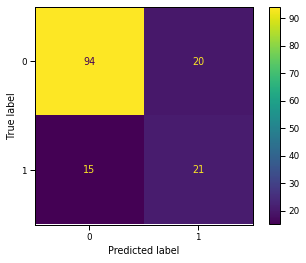

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model2_gs, X_test_norm, y_test)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



